In [1]:
import IsoDAT2D as iso
import SimDAT2D as sim
import dask.array as da
import dask.dataframe as dd
import masking
import matplotlib.pyplot as plt

/home/dalverson/miniconda3/envs/venv/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
CeO2


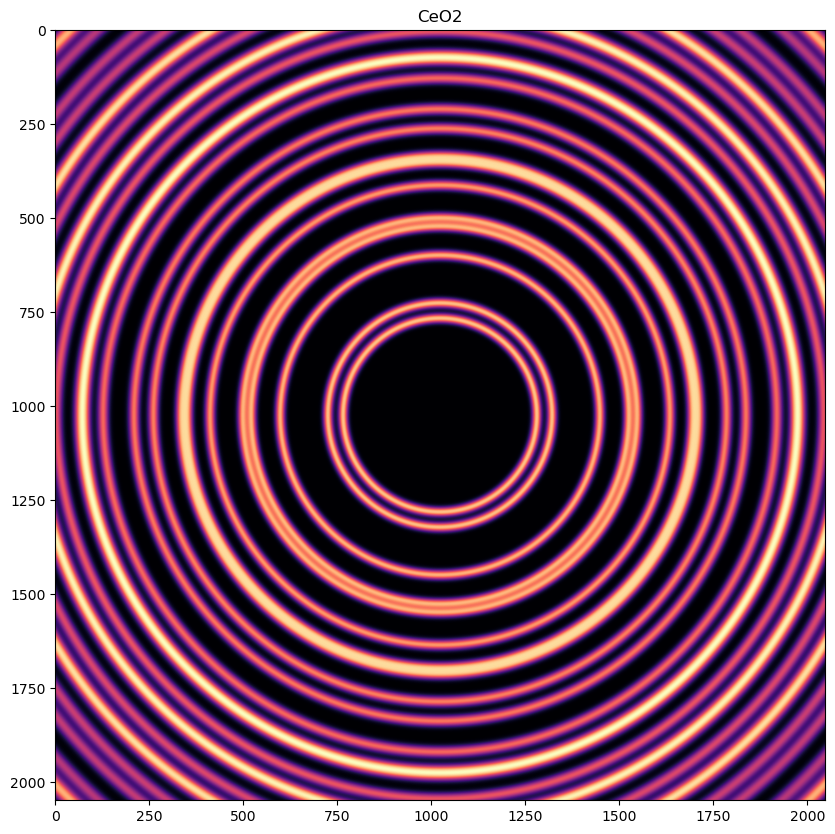

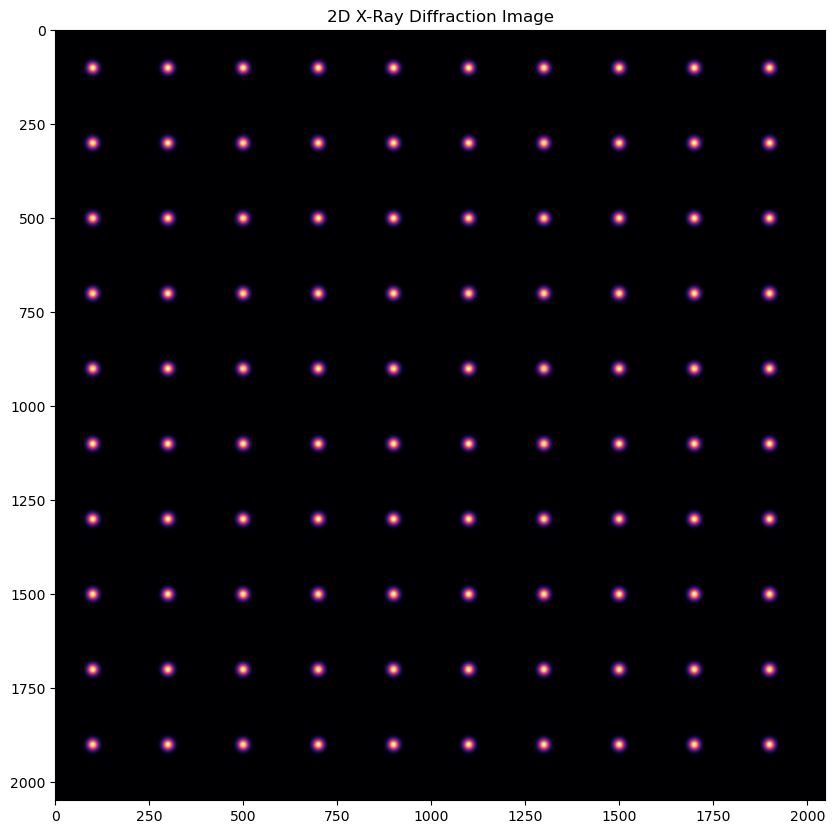

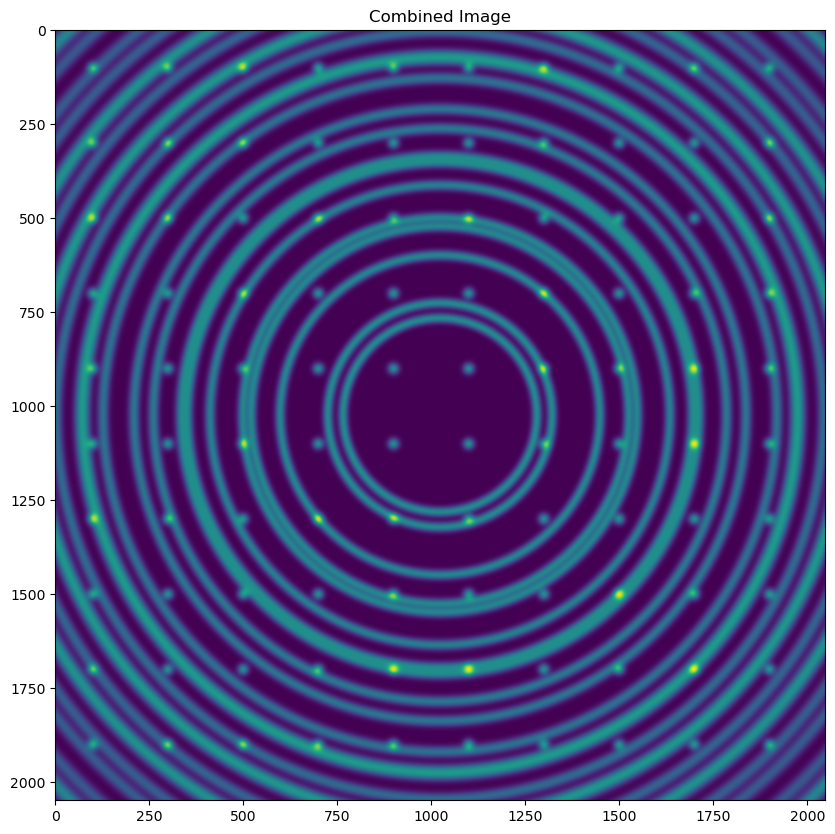

In [2]:
data = sim.combine_image(sim.create_isotropic(.4, .4e-10, cmap = 'magma'), sim.create_anisotropic(15, 10, 200, size = 200, cmap = 'magma'))

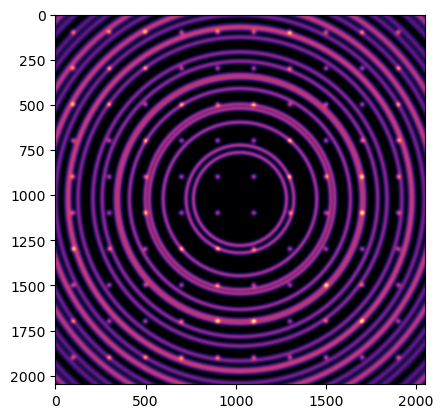

In [3]:
plt.imshow(data, cmap = 'magma')

In [4]:
import numpy as np
np.save('simulated_data.npy', data)

In [5]:
array, ai_pe = masking.make_chi_array(data, .4, .4e-10)

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

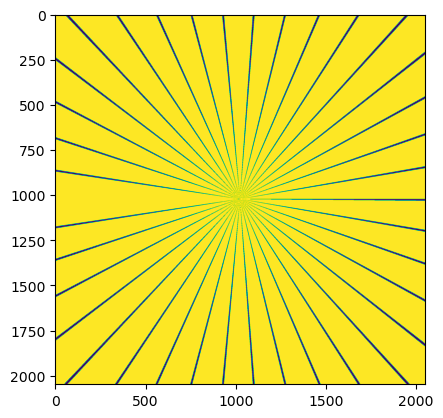

In [6]:
masks = masking.generate_mask_slices(array, .5, 22, 9)

In [7]:
#I want to make several masks with more and more slices, and save them as a list of masks

def make_masks(array, slices):
    masks = []
    for i in slices:
        masks.append(masking.generate_mask_slices(array, 1, i, 8))
        print('Mask with {} slices created'.format(i))
    return masks

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

/blue/mbutala/dalverson/SimDAT2D/SimDAT2D/masking.py:120: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Mask with dask.array<getitem, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray> slices created
[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.0001710054467

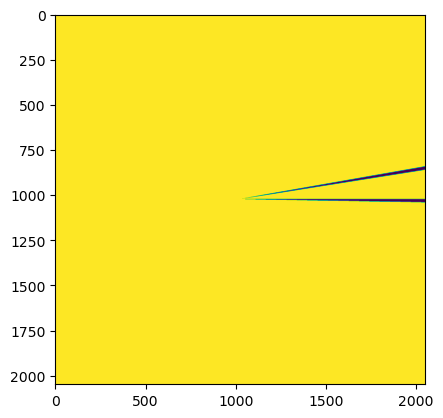

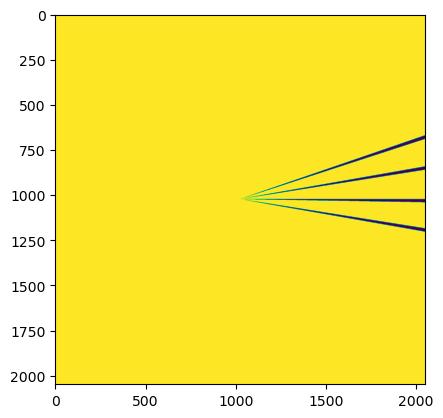

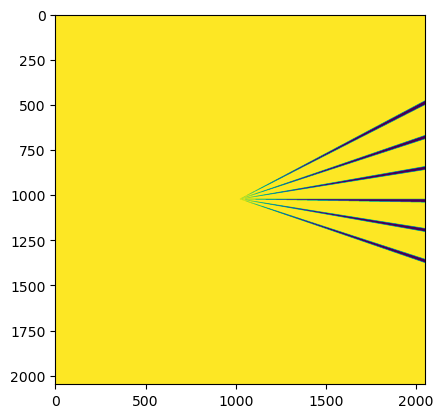

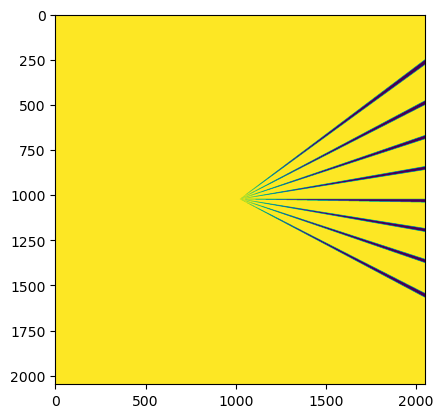

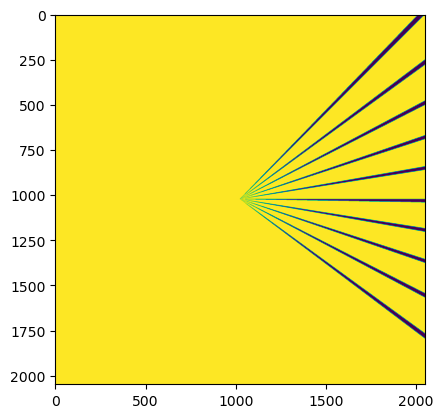

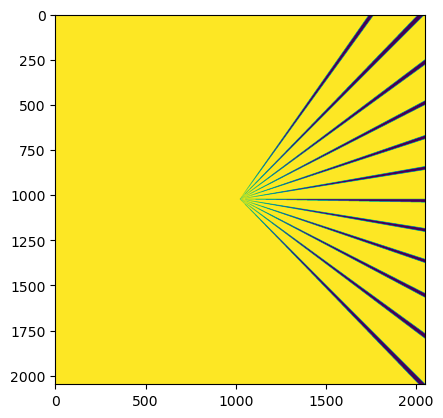

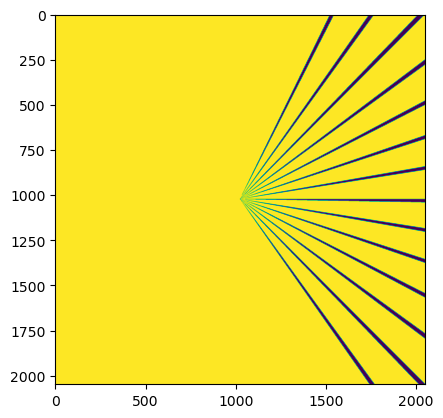

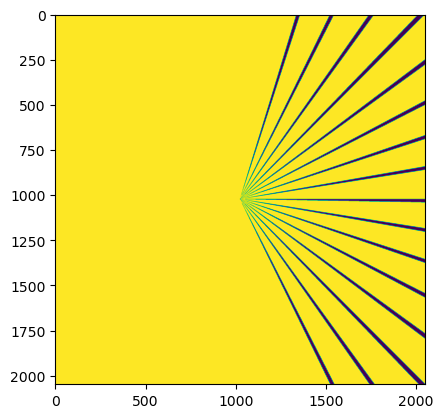

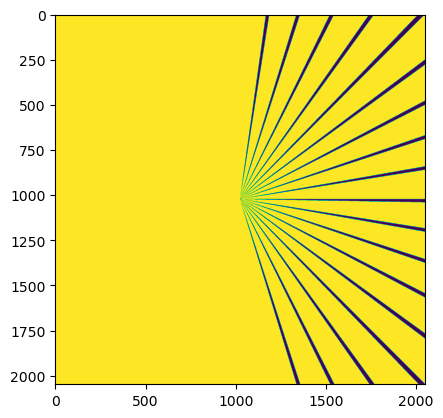

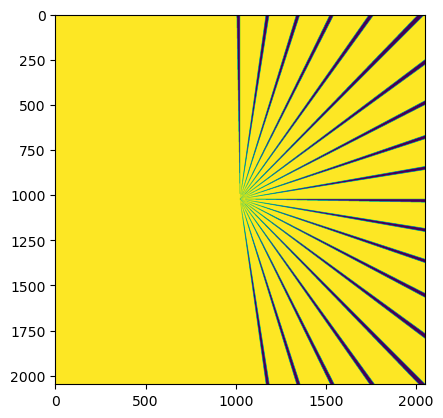

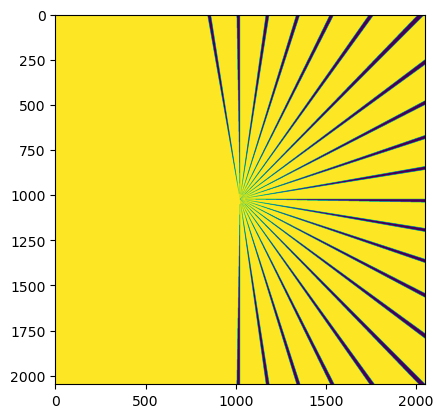

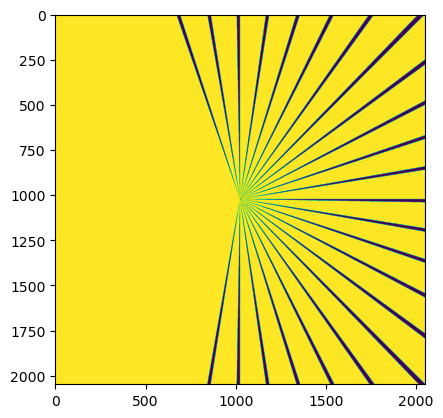

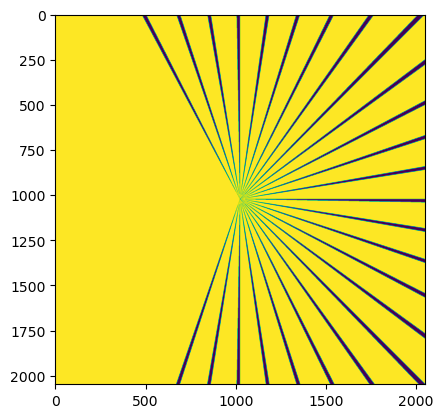

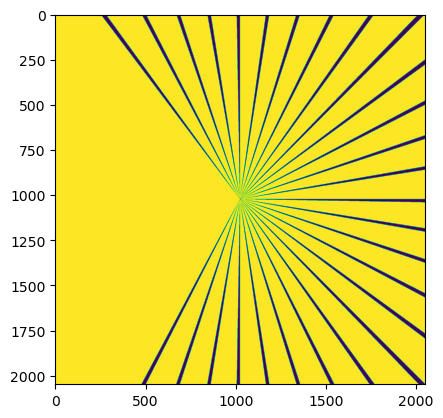

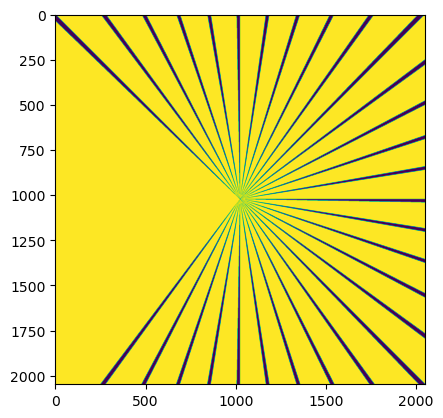

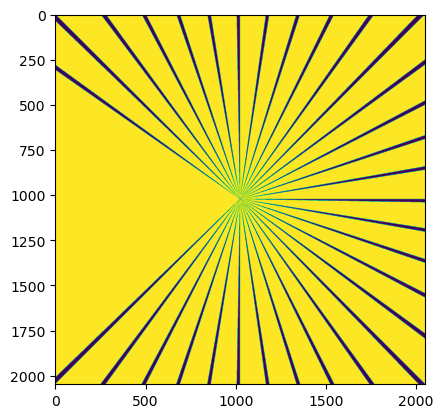

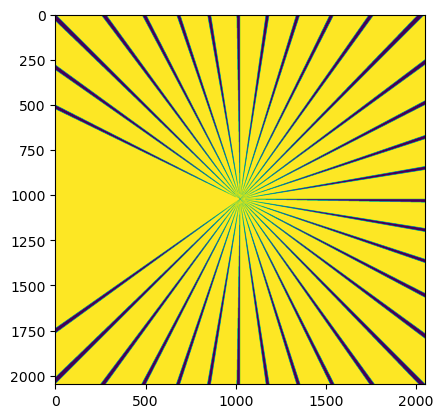

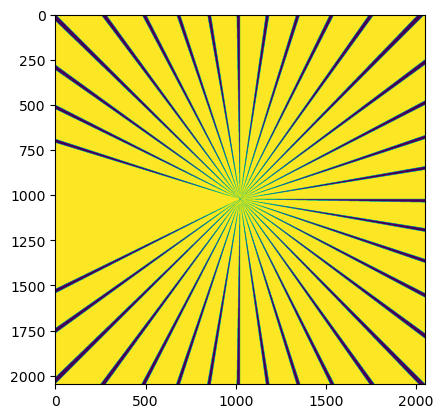

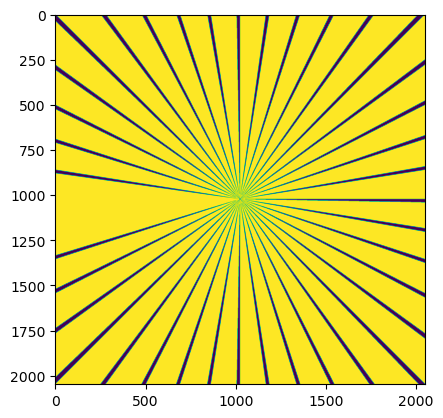

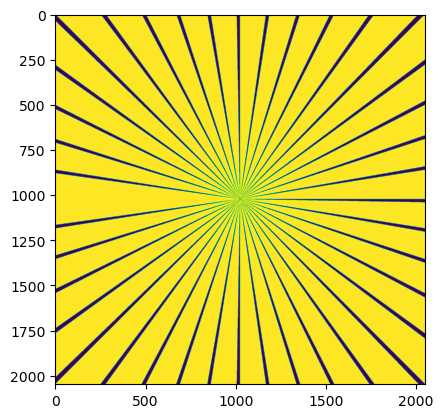

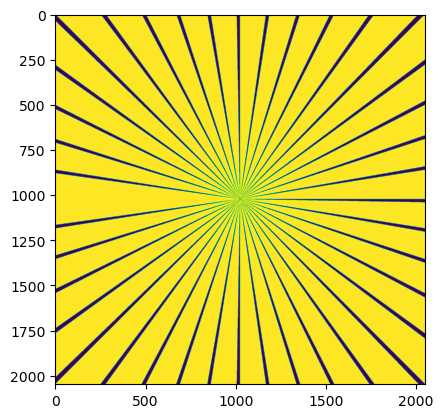

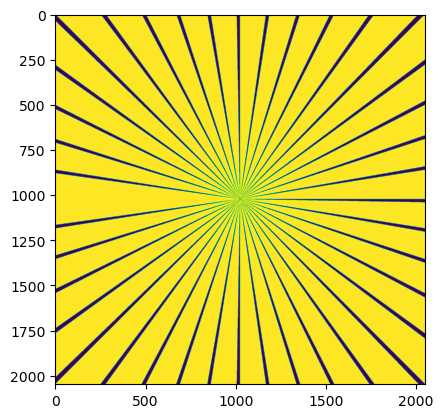

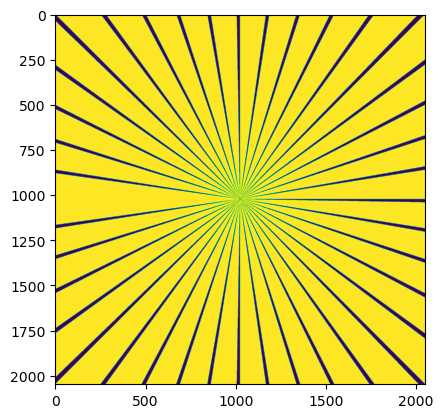

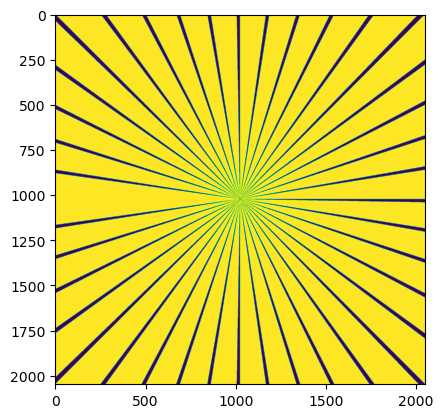

In [8]:
slices = da.arange(1, 25, 1)
my_masks = make_masks(array,slices )

In [9]:
masks = []
for i in range(len(my_masks)):
  masks.append(masking.rotate_mask_360(my_masks[i], 360, 1, plot = False))

In [10]:
flat_list = [element for inner_list in masks for element in inner_list]

In [11]:
len(flat_list)

8592

In [24]:
integrations = []
for i in range(len(flat_list)):
    q, I = sim.integrate_image(data, .4, .4e-10, 1000, flat_list[i])
    integrations.append(I)
    print('Integration {} of {} complete'.format(i+1, len(flat_list)))

Integration 1 of 8592 complete
Integration 2 of 8592 complete
Integration 3 of 8592 complete
Integration 4 of 8592 complete
Integration 5 of 8592 complete
Integration 6 of 8592 complete
Integration 7 of 8592 complete
Integration 8 of 8592 complete
Integration 9 of 8592 complete
Integration 10 of 8592 complete
Integration 11 of 8592 complete
Integration 12 of 8592 complete
Integration 13 of 8592 complete
Integration 14 of 8592 complete
Integration 15 of 8592 complete
Integration 16 of 8592 complete
Integration 17 of 8592 complete
Integration 18 of 8592 complete
Integration 19 of 8592 complete
Integration 20 of 8592 complete
Integration 21 of 8592 complete
Integration 22 of 8592 complete
Integration 23 of 8592 complete
Integration 24 of 8592 complete
Integration 25 of 8592 complete
Integration 26 of 8592 complete
Integration 27 of 8592 complete
Integration 28 of 8592 complete
Integration 29 of 8592 complete
Integration 30 of 8592 complete
Integration 31 of 8592 complete
Integration 32 of

KeyboardInterrupt: 

In [25]:
len(integrations)

1072

In [16]:
da_data = da.from_array(data, chunks = (100,100))

In [17]:
da_data[1]

dask.array<getitem, shape=(2048,), dtype=float64, chunksize=(100,), chunktype=numpy.ndarray>

In [20]:
import dask
import dask.array as da
from dask import delayed
from dask.diagnostics import ProgressBar

# Assuming sim.integrate_image is a function that takes some time
# and flat_list is a list of arguments for each integration

@delayed
def integrate_image_wrapper(data, *args):
    return sim.integrate_image(data, *args)

# Convert data to a Dask array
da_data = da.from_array(data, chunks=(100, 100))

# Create delayed objects for each integration
delayed_integrations = [integrate_image_wrapper(da_data, 0.4, 0.4e-10, 1000, arg) for arg in flat_list]

# Use ProgressBar to track progress
#with ProgressBar():
    # Trigger computation and gather results
 #   results = dask.compute(*delayed_integrations)

# Access results as a list
my_da_ints = list(results)


[#                                       ] | 4% Completed | 413.65 ss


KeyboardInterrupt: 

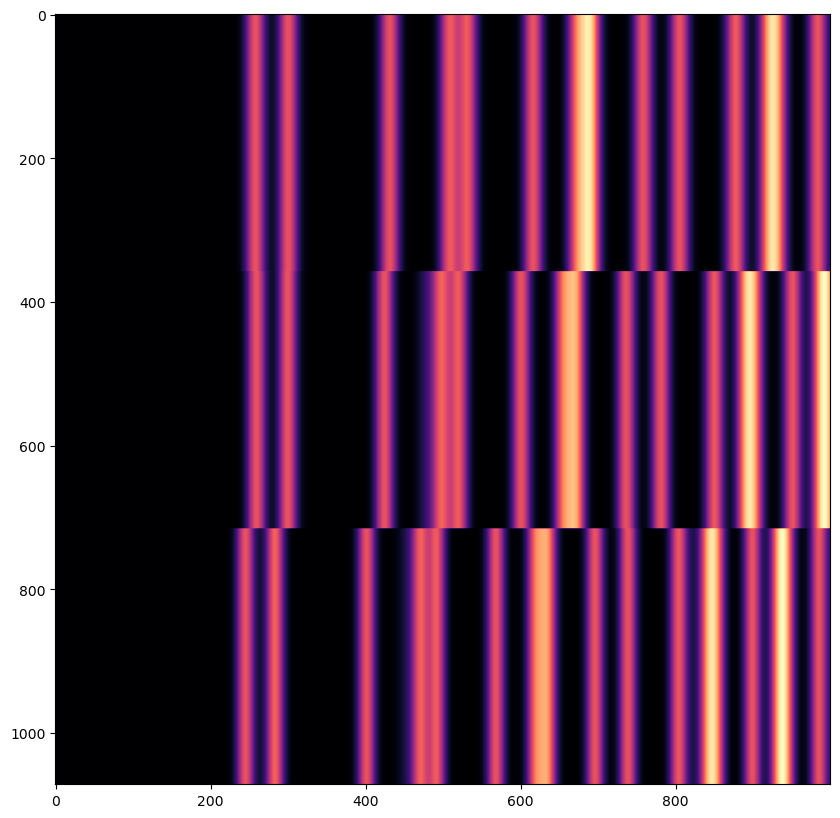

In [27]:
#waterfall plot the 8500 integrations
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(integrations, cmap = 'magma', aspect = 'auto')

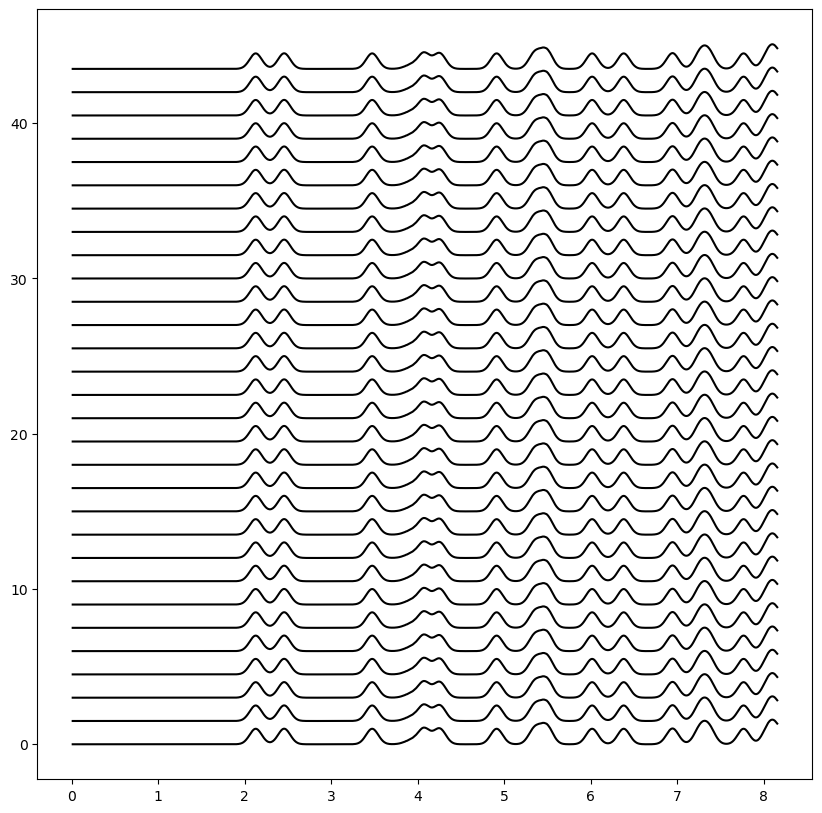

In [56]:
#waterfall plot the 8500 integrations
offset = 1.5
plt.figure(figsize = (10,10))
for i in range(30):
    plt.plot(q, integrations[i+400] + i * offset, color='black')

In [30]:
len(q)

1000

In [63]:
q, pure = sim.integrate_image(data, .4, .4e-10, 1000)

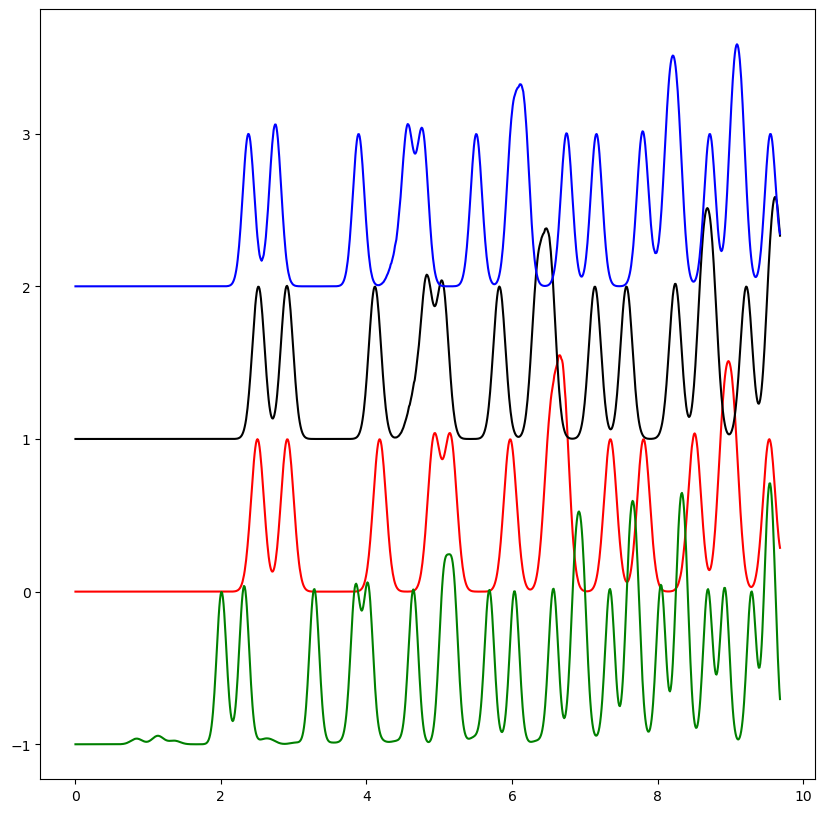

In [66]:
plt.figure(figsize = (10,10))
plt.plot(q, integrations[350], color='red')
plt.plot(q, integrations[550]+1, color='black')
plt.plot(q, integrations[1000]+2, color='blue')
plt.plot(q, pure-1, color = 'green')

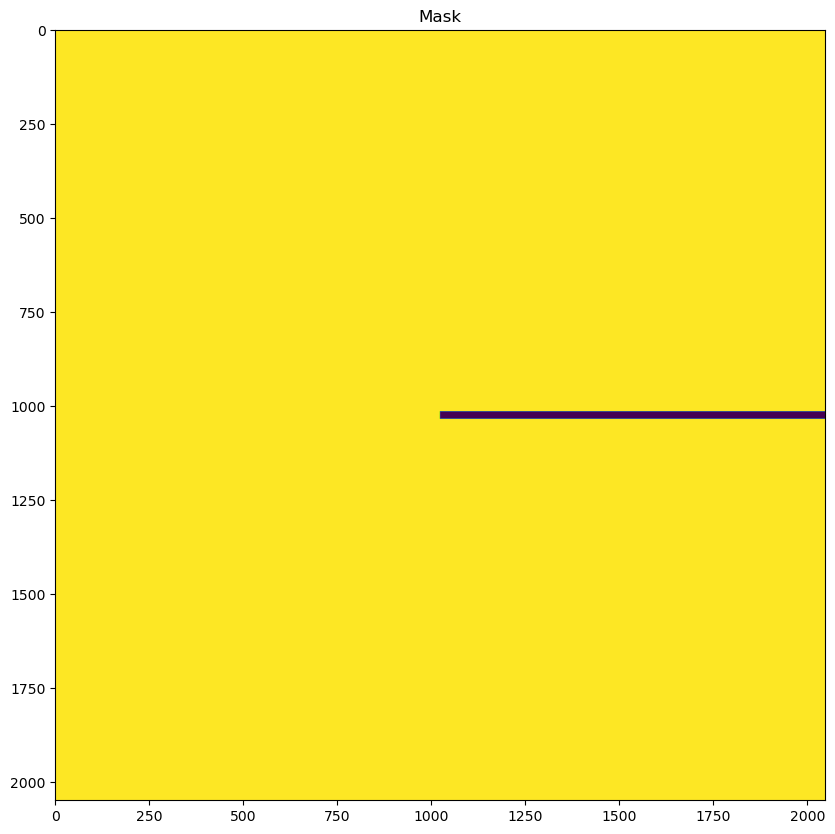

In [74]:
one = sim.create_mask(data, 10)

In [70]:
print(flat_list[0])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


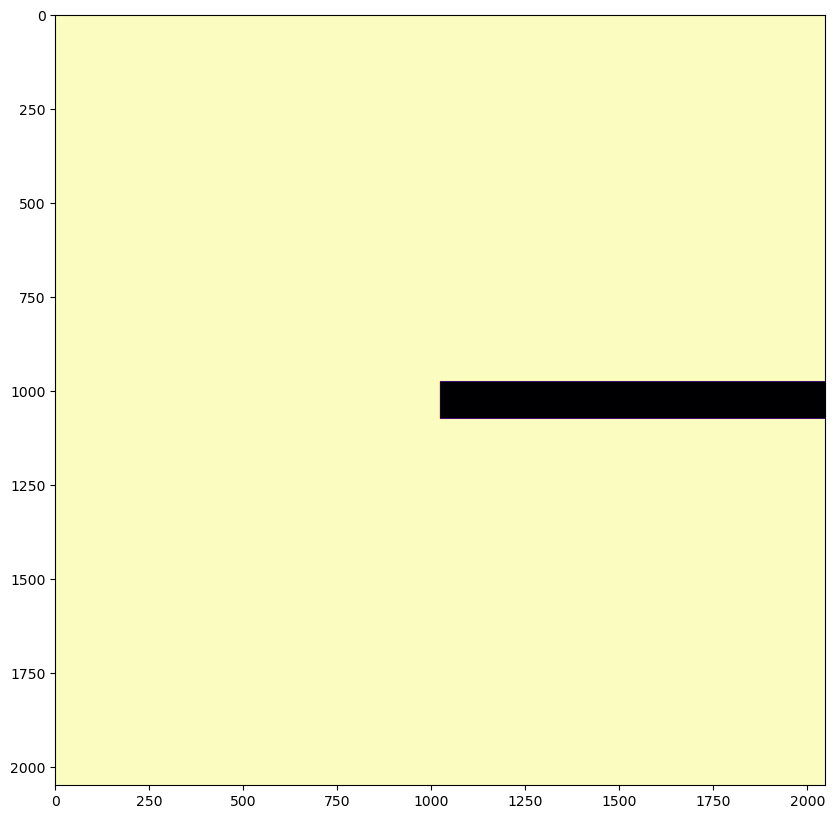

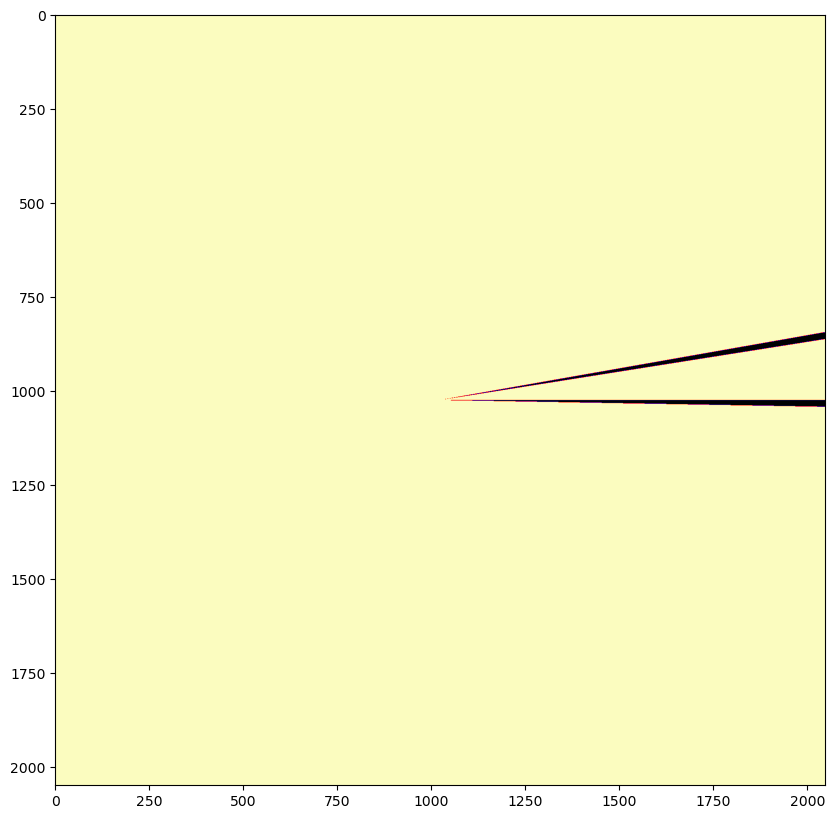

In [73]:
#I want to show to masks one on the left and one on the right
#the one on the left will be the mask one and the one on the right to be a mask from the flat_list

plt.figure(figsize = (10,10))
plt.imshow(one, cmap = 'magma')
plt.figure(figsize = (10,10))
plt.imshow(flat_list[0], cmap = 'magma')


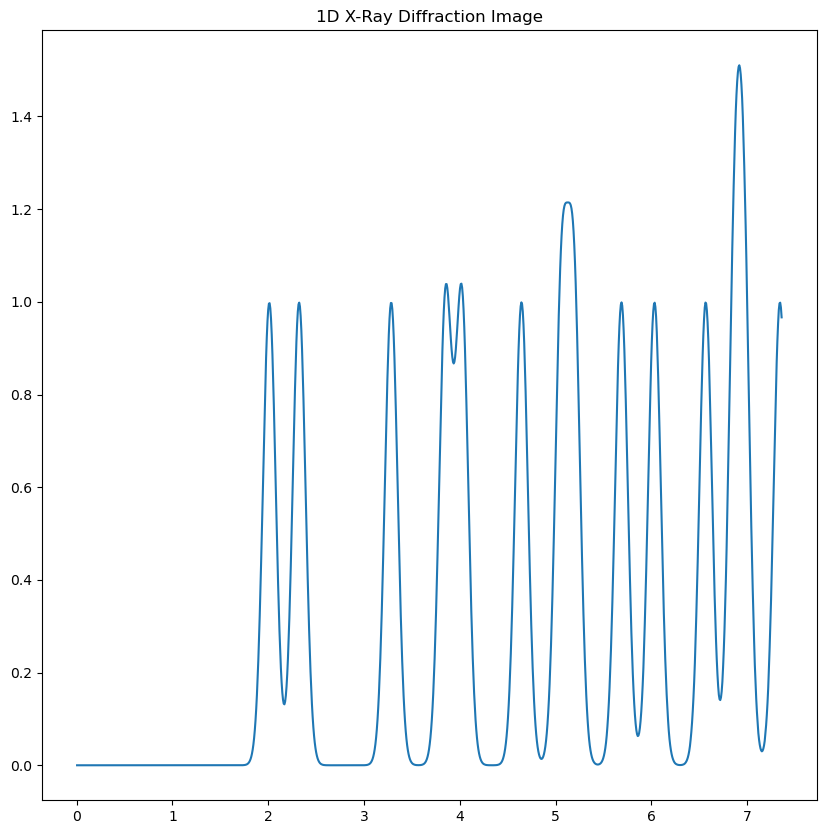

In [79]:
q, one_int = sim.integrate_image(data, .4, .4e-10, 1000, one, show = True)

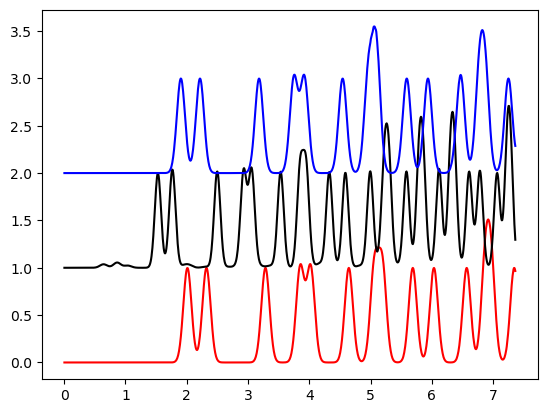

In [82]:
plt.plot(q, one_int, color = 'red')
plt.plot(q, pure+1, color = 'black')
plt.plot(q, integrations[0]+2, color = 'blue')